In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.datasets import fetch_california_housing

In [2]:
class LinearRegression: #class for linear regression model
    def __init__(self, X, y, learning_rate=0.01, tolerance=1e-3, max_iterations=50000, regularization=False, lamda=0.05, batch_size=1):
        self.X = X 
        self.y = y 
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.regularization = regularization
        self.lamda = lamda
        self.batch_size = batch_size
        self.w = None
        self.b = None
        self.error_sequence = []

    def normalize_train_data(self, X): #normalizing the data
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        X = (X - self.mean) / self.std
        X = np.column_stack([np.ones((X.shape[0], 1)), X])
        return X, self.mean, self.std

    def normalize_test_data(self, X_test, mean, std): #normalizing the test data
        X_test = (X_test - mean) / std
        X_test = np.column_stack([np.ones((X_test.shape[0], 1)), X_test])
        return X_test

    def stochastic_gradient_descent(self, X, y): #stochastic gradient descent algorithm
        self.w = np.zeros(X.shape[1], dtype=np.float64)
        self.b = 0
        last_cost = np.inf
        for tq in tqdm(range(self.max_iterations)):
            # Randomly shuffle the data
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0, X.shape[0], self.batch_size):
                xi = X_shuffled[i:i+self.batch_size]
                yi = y_shuffled[i:i+self.batch_size]
                y_pred = self.predict(xi)
                dw = xi.T.dot(y_pred - yi)
                db = np.sum(y_pred - yi)
                if self.regularization:
                    dw += (self.lamda * self.w)
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db
            cost = self.cost(X, y)
            diff = last_cost - cost
            last_cost = cost
            self.error_sequence.append(cost)
            if np.abs(diff) < self.tolerance:
                print("Model stopped learning")
                break
        self.plot_cost()

    def predict(self, X): #predicting the output
        return X.dot(self.w) + self.b

    def cost(self, X, y): #calculating the cost function
        y_pred = self.predict(X)
        if self.regularization:
            return np.sum((y_pred - y) ** 2) / X.shape[0] + (self.lamda * np.sum(self.w ** 2))
        else:
            return np.sum((y_pred - y) ** 2) / X.shape[0]

    def plot_cost(self): #plotting the cost function over iterations
        plt.plot(self.error_sequence)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Iterations vs cost")
        plt.show()

    def split_data(self): #splitting the data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=0)
        return X_train, X_test, y_train, y_test
    
    def rmse(self, X, y): #calculating the root mean square error
        y_hat = self.predict(X)
        return np.sqrt(((y_hat - y) ** 2).mean())

    def sse(self, X, y): #calculating the sum of square error
        y_hat = self.predict(X)
        return ((y_hat - y) ** 2).sum()

    def fit(self): #fitting the model to the data
        X_train, X_test, y_train, y_test = self.split_data()
        X_train, self.train_mean, self.train_std = self.normalize_train_data(X_train)
        X_test = self.normalize_test_data(X_test, self.train_mean, self.train_std)
        
        if self.batch_size == 1:
            print("Performing True Stochastic Gradient Descent")
        else:
            print(f"Performing Mini-Batch Stochastic Gradient Descent with batch size {self.batch_size}")
            
        self.stochastic_gradient_descent(X_train, y_train)
        
        test_rmse = self.rmse(X_test, y_test)
        test_sse = self.sse(X_test, y_test)
        predictions = self.predict(X_test)
        
        plt.scatter(y_test, predictions, label='Predictions', color='red', marker='x')
        plt.scatter(y_test, y_test, label='Actual Labels', color='blue', marker='o')
        plt.xlabel("Actual Labels")
        plt.ylabel("Predictions")
        plt.title("Actual vs Predicted Labels")
        plt.legend()
        plt.show()
        
        print("Predictions: ", predictions)
        print("Labeled predictions: ", y_test)
        print("Root Mean Square Error: ", test_rmse)
        print("Sum of Square Error: ", test_sse)


Performing True Stochastic Gradient Descent without Regularisation

Performing True Stochastic Gradient Descent


 32%|███▏      | 321/1000 [01:09<02:27,  4.60it/s]

Model stopped learning


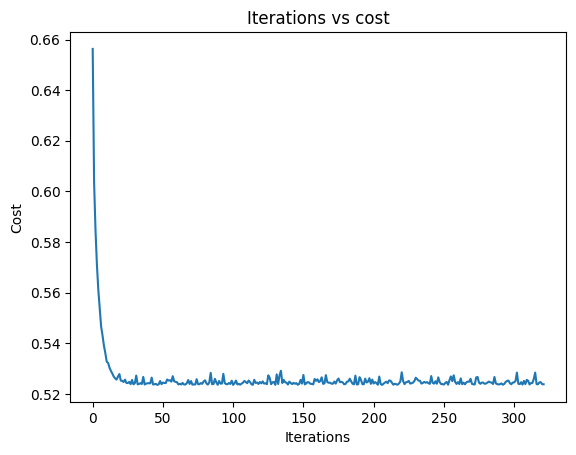

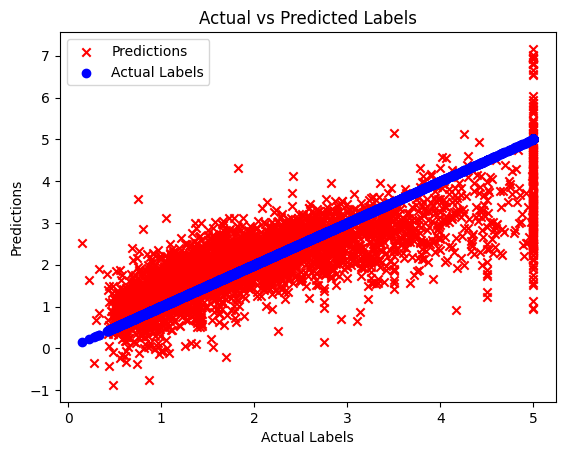

Predictions:  [2.2873919  2.79968892 1.91328531 ... 0.84111047 2.81428755 2.21874997]
Labeled predictions:  [1.369 2.413 2.007 ... 1.286 2.595 1.676]
Root Mean Square Error:  0.7270545786184954
Sum of Square Error:  2182.095311277607


In [4]:
cal_housing = fetch_california_housing()

# Creating an instance of linear_regression class without regularisation
lr = LinearRegression(cal_housing.data, cal_housing.target, learning_rate=0.0001, tolerance=1e-5, max_iterations=1000, regularization=False, lamda=0.05, batch_size=1)

# Training and predicting
lr.fit()

Performing True Stochastic Gradient Descent with Regularisation

Performing True Stochastic Gradient Descent


  0%|          | 0/1000 [00:00<?, ?it/s]

 30%|███       | 304/1000 [01:14<02:51,  4.06it/s]

Model stopped learning


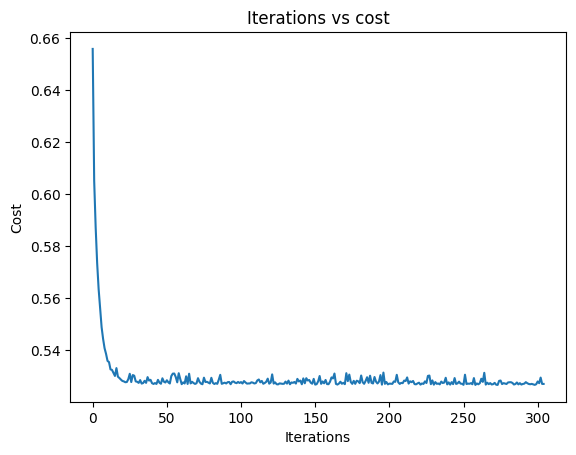

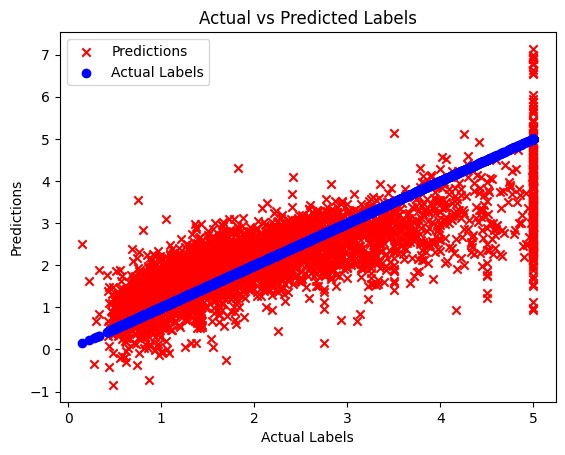

Predictions:  [2.28549367 2.79453218 1.90848877 ... 0.84691456 2.80169914 2.21424548]
Labeled predictions:  [1.369 2.413 2.007 ... 1.286 2.595 1.676]
Root Mean Square Error:  0.7277390503633401
Sum of Square Error:  2186.205829749182


In [8]:
cal_housing = fetch_california_housing()

# Creating an instance of linear_regression class without regularisation
lr = LinearRegression(cal_housing.data, cal_housing.target, learning_rate=0.0001, tolerance=1e-5, max_iterations=1000, regularization=True, lamda=0.001, batch_size=1)

# Training and predicting
lr.fit()

Performing Mini-Batch Stochastic Gradient Descent without Regularisation

Performing Mini-Batch Stochastic Gradient Descent with batch size 10


  0%|          | 0/1000 [00:00<?, ?it/s]

 26%|██▌       | 255/1000 [00:06<00:20, 36.87it/s]


Model stopped learning


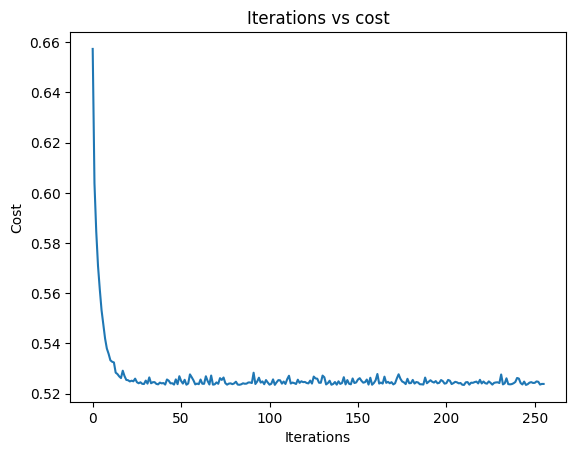

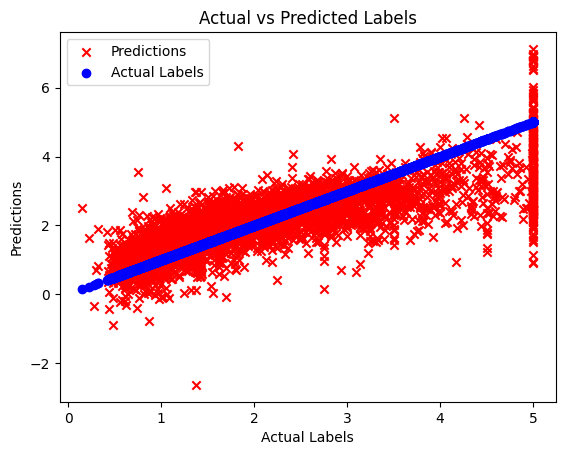

Predictions:  [2.28024826 2.78785183 1.90090938 ... 0.83308749 2.79744478 2.21262011]
Labeled predictions:  [1.369 2.413 2.007 ... 1.286 2.595 1.676]
Root Mean Square Error:  0.72856461177723
Sum of Square Error:  2191.168792508789


In [3]:
cal_housing = fetch_california_housing()

# Creating an instance of linear_regression class without regularisation
lr = LinearRegression(cal_housing.data, cal_housing.target, learning_rate=0.0001, tolerance=1e-5, max_iterations=1000, regularization=False, lamda=0.05, batch_size=10)

# Training and predicting
lr.fit()

Performing Mini-Batch Stochastic Gradient Descent with Regularisation

Performing Mini-Batch Stochastic Gradient Descent with batch size 10


 22%|██▏       | 223/1000 [00:06<00:23, 33.59it/s]


Model stopped learning


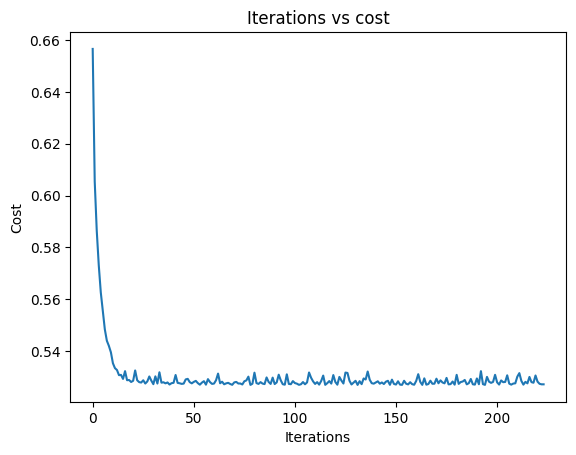

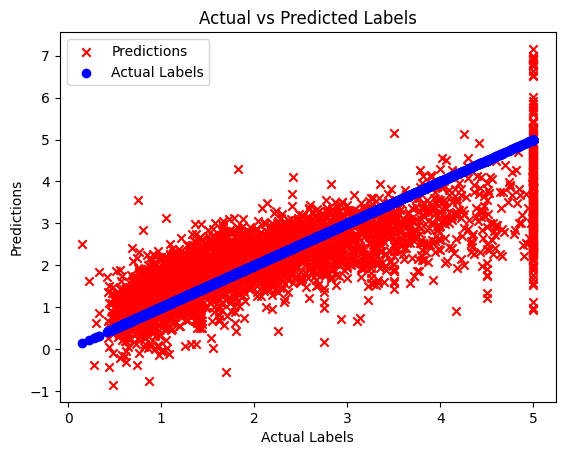

Predictions:  [2.27593867 2.79047814 1.91974292 ... 0.85372918 2.81051911 2.21892474]
Labeled predictions:  [1.369 2.413 2.007 ... 1.286 2.595 1.676]
Root Mean Square Error:  0.7274877530292191
Sum of Square Error:  2184.696242373368


In [3]:
cal_housing = fetch_california_housing()

# Creating an instance of linear_regression class without regularisation
lr = LinearRegression(cal_housing.data, cal_housing.target, learning_rate=0.0001, tolerance=1e-5, max_iterations=1000, regularization=True, lamda=0.001, batch_size=10)

# Training and predicting
lr.fit()

Validating the model using Sklearn Library

In [4]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading the California Housing dataset
cal_housing = fetch_california_housing()

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data, cal_housing.target, test_size=0.2, random_state=0)

# Creating a pipeline with feature scaling and linear regression
model = make_pipeline(StandardScaler(), LinearRegression())

# Training the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
test_rmse = np.sqrt(((model.predict(X_test) - y_test) ** 2).mean())
print("Root Mean Square Error (Test): ", test_rmse)

# Performing cross-validation to get a more robust estimate of model performance
cv_scores = cross_val_score(model, cal_housing.data, cal_housing.target, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("Root Mean Square Error (Cross-Validation): ", cv_rmse)

Root Mean Square Error (Test):  0.7273129773603114
Root Mean Square Error (Cross-Validation):  0.7471881769465138
